# Evolució dels preus de l'arxiu `calendar.csv`

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
calendar = pd.read_csv('calendar/calendar.csv') #arxiu amb calendari de disponibilat i preu
data = pd.read_csv('listings_1.csv') #arxiu de listings complet

C:\Users\Biel\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
calendar.head(2)

,listing_id,date,available,price
0,10159551,2017-11-02,t,$132.00
1,10159551,2017-11-01,t,$132.00


Com que l'arxiu `calendar` és molt gran agafam un subset, per exemple, de Palma:

In [4]:
# ids dels listings que es troben a ciutat
palma_ids = data['id'][data.neighbourhood_cleansed=='Palma de Mallorca'].unique()

In [5]:
#mapeig de l'arxiu calendar sols amb el listind_id que es troben a Palma
palma_calendar = calendar[calendar.listing_id.isin(palma_ids)].reset_index(drop=True)

In [6]:
#llevam simbols i convertim a floats
palma_calendar.price = palma_calendar.price.str.replace('$','')
palma_calendar.price = palma_calendar.price.convert_objects(convert_numeric=True)

C:\Users\Biel\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


`calendar.csv` té 365 dates per listing (entre 15/03/2017 i 15/03/2018). El preu sols està apuntat si la disponibilitat és `t` (True). Per veure l'evolució del preu feim una mitjana dels preus per dia:

In [7]:
palma_price = palma_calendar.groupby(['date']).price.mean()

plot de l'evolució dels preus:

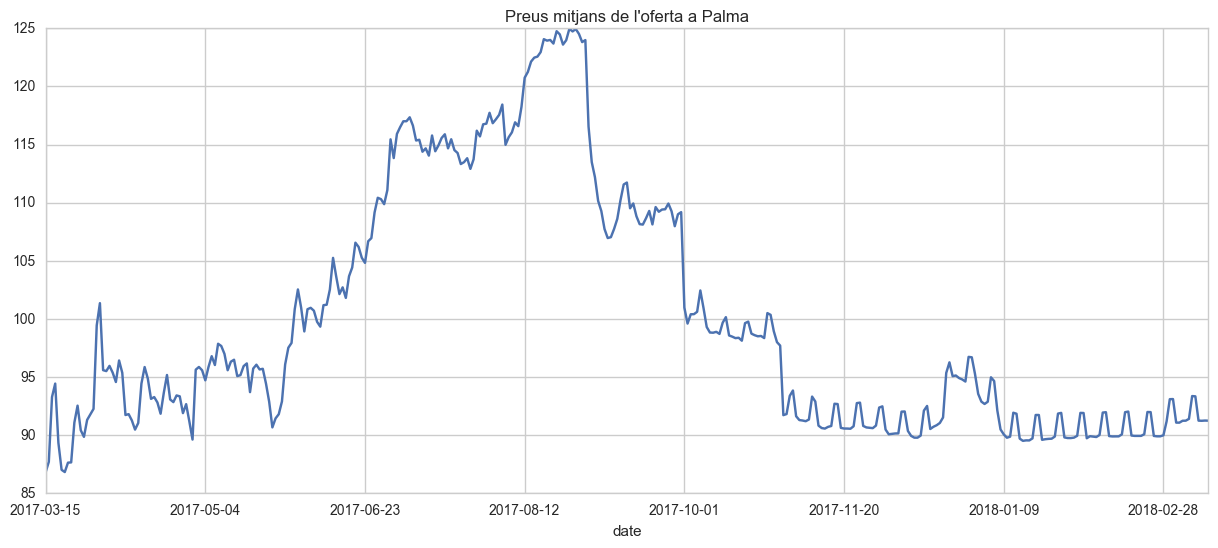

In [15]:
palma_price.plot(figsize=(15,6))
plt.title("Preus mitjans de l'oferta a Palma")

Dues estacionalitats clarament presents: pugen els preus dels mesos d'estiu i els preus dels caps de setmana.

Demostram que els preus dels caps de setmana pugen fent una `rolling_mean` amb una finestra de 7 dies. Si la finestra no és de 7 dies no s'eliminen les estacionalitas setmanals:



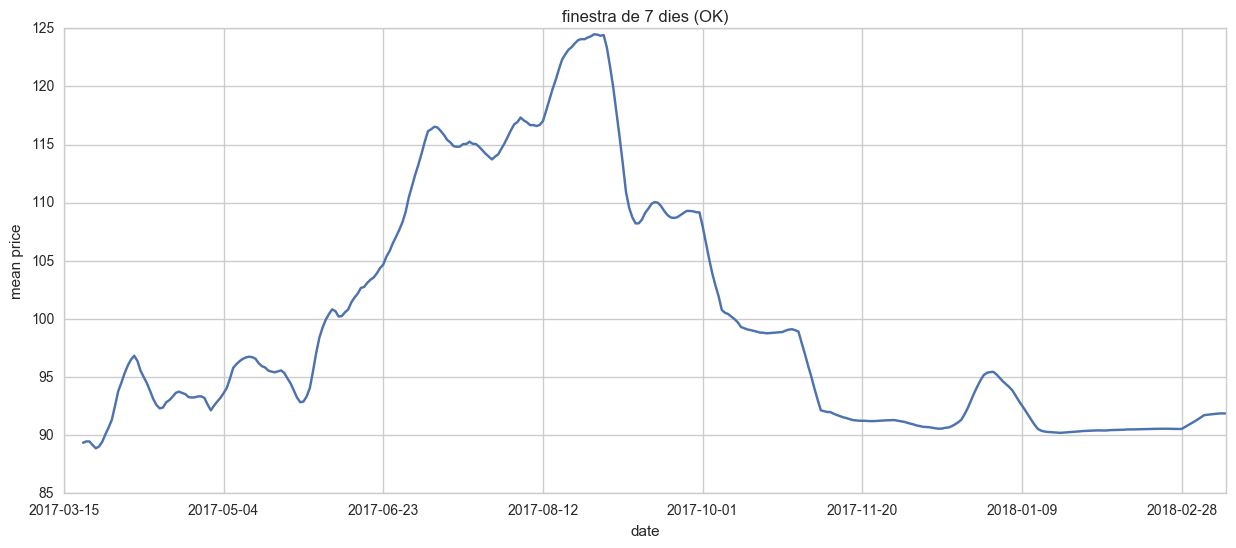

In [13]:
palma_price.rolling(window=7).mean().plot(figsize=(15,6))
plt.title('finestra de 7 dies (OK)')
plt.ylabel('mean price')

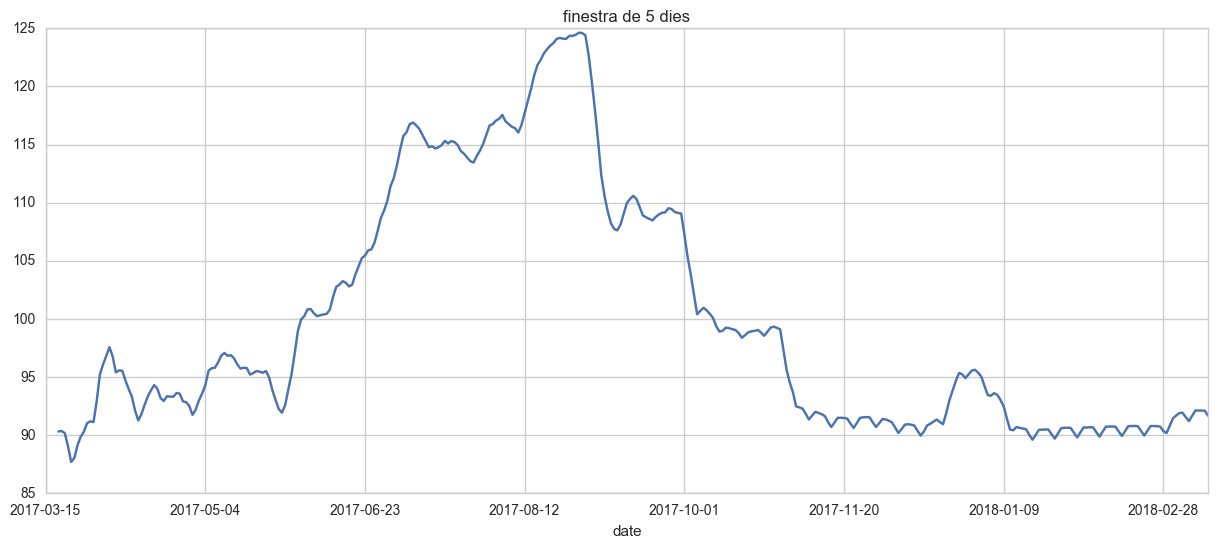

In [10]:
palma_price.rolling(window=5).mean().plot(figsize=(15,6))
plt.title('finestra de 5 dies')

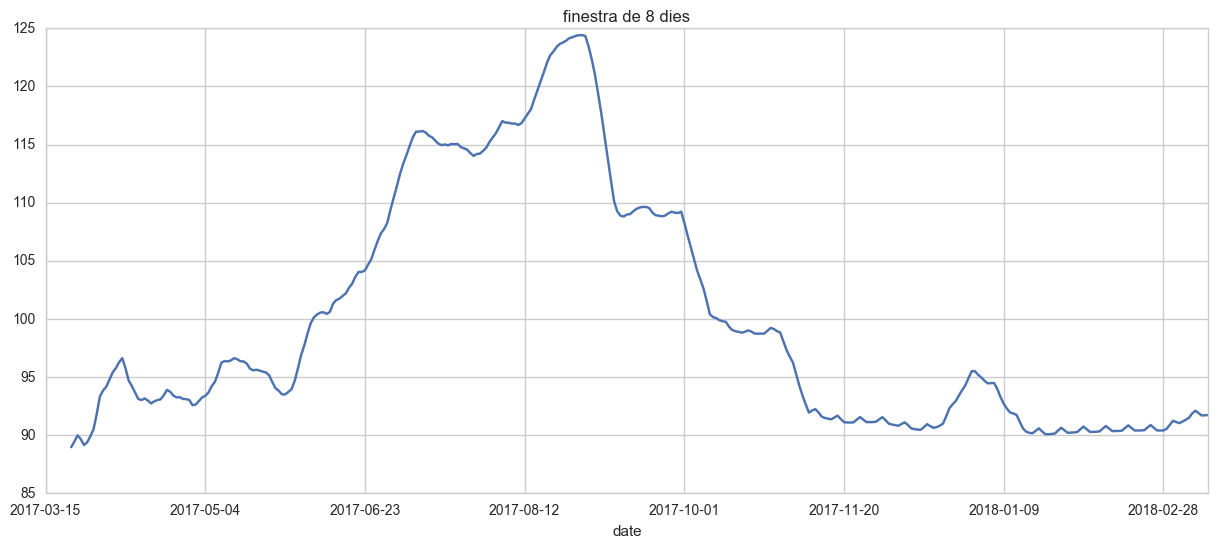

In [11]:
palma_price.rolling(window=9).mean().plot(figsize=(15,6))
plt.title('finestra de 8 dies')